# MCMC

This notebook showcases the `MCMC` educational library for various Markov chain Monte Carlo sampling methods. In this example, we sample a bivariate normal target distribution using the Metropolis Hastings algorithm. 

The first step is to import the required libraries and the target distribution before using the `Metropolis_Hastings` sampler in the library. We then use kernel density estimation to plot the marginals and reconstruct the distribution. Finally, the autocorrelation and trace plots can be produced.


In [1]:
import MCMC
import numpy as np
import scipy.stats as st

In [2]:
# set mean and covariance for Q
mean = np.array([0, 1])
var = np.array([[1, .5], [.5, 1]])

In [3]:
def ptarget(x, y):
    '''The distribution we wish to sample, returns float.'''
    return st.multivariate_normal.pdf([x, y], mean=mean, cov=var)

In [4]:
# generate 750 samples with (x0,y0) = (-5,-5) and step size 0.4
samples = MCMC.Metropolis_Hastings(ptarget, 750, -5, -5, 0.4)

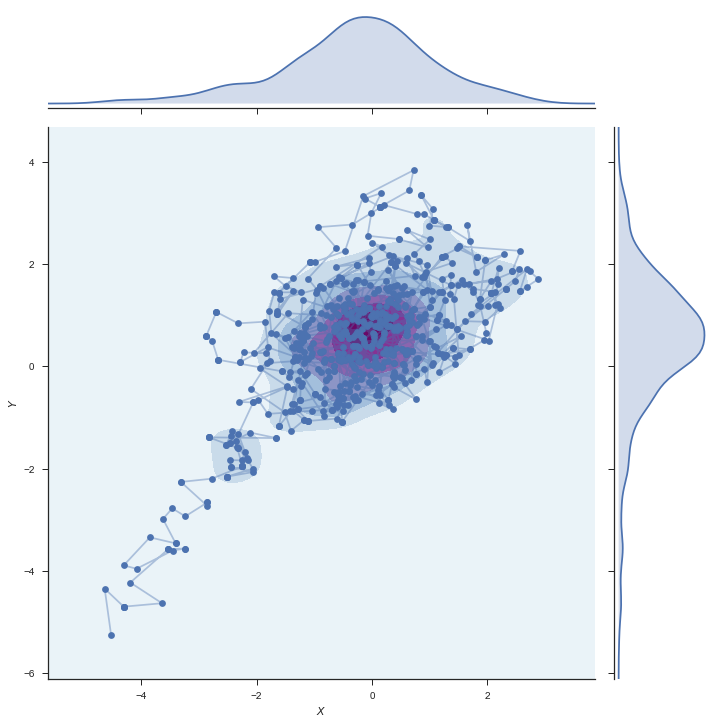

In [5]:
# visualise the samples
MCMC.plot_dist(samples[:, 0], samples[:, 1])

The initial guess $(x_0,y_0) = (-5,-5)$ is clearly not accurate; however, the algorithm quickly finds regions of higher Lebesgue measure. The trace plot shows how the sampling stabilises within this region over the run time. 

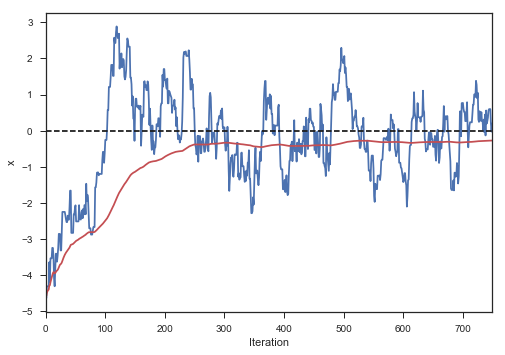

In [6]:
# traceplot in the x-dimension
MCMC.traceplot(samples[:, 0])

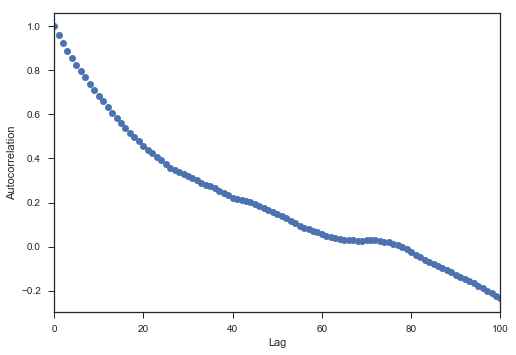

In [7]:
# autocorrelation in the x-dimension
MCMC.autocorrelation_plot(samples[:, 0], 100)